In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math as m

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [2]:
var = 225
accuracy = 3
conf_level = 0.95

In [3]:
z = 1.96 # по таблице значений квантилей нормального распределения
sd = m.sqrt(var)

In [4]:
n = (z * sd / accuracy) ** 2

In [5]:
print(f'Минимально необходимый объем выборки — {round(n)}')

Минимально необходимый объем выборки — 96


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [6]:
n = 25
x_mean = 130
sd = 15

In [7]:
z = 2.326 # табличное значение
n_sqrt = m.sqrt(n)
accuracy = sd / n_sqrt * z

x_inter_start = x_mean - accuracy
x_inter_end = x_mean + accuracy

In [8]:
L = accuracy * 2

In [9]:
print(f'Длина доверительного интервала — {round(L)}')

Длина доверительного интервала — 14


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [10]:
np.random.seed(42) #фиксация случайности

men = stats.norm.rvs(loc=171, scale=100, size=150000) # Выборка мужчин со средним ростом 171
women = stats.norm.rvs(loc=170, scale=100, size=150000) # Выборка женщин со средним ростом 170
alpha = 0.001

In [11]:
p_value = stats.ttest_ind(men, women).pvalue
p_value

0.00024875321033580573

Различие между выборками значительно, p-value меньше $\alpha$, нулевая гипотеза отвергается.

Посмотрим на визуализацию.

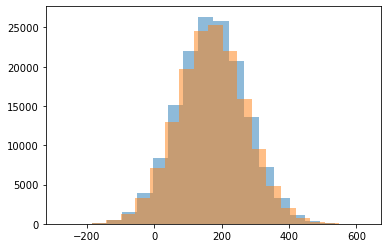

In [12]:
plt.hist(men, bins=20, alpha=0.5)
plt.hist(women, bins=20, alpha=0.5)
plt.show()

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [13]:
sd = 150
accuracy = 50
conf_level = 0.95

In [14]:
z = 1.96 # по таблице

In [15]:
n = (z * sd / accuracy) ** 2

In [16]:
print(f'Минимально необходимый объем выборки — {round(n)}')

Минимально необходимый объем выборки — 35


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [17]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [18]:
oddsratio, pvalue = stats.fisher_exact(observations)
pvalue

0.35417955365927367

p-value больше 0.05, нулевая гипотеза не отвергается, "волшебник" не умеет предсказывать погоду.

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [19]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [20]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h 

In [21]:
mean_confidence_interval(data, 0.90)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [22]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

In [23]:
stats.mannwhitneyu(A, B).pvalue

9.602040500172804e-21

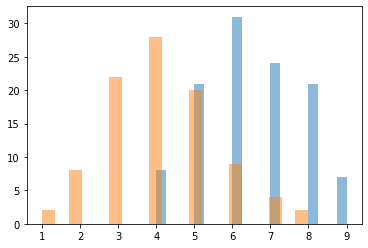

In [24]:
plt.hist(A, bins=20, alpha=0.5)
plt.hist(B, bins=20, alpha=0.5)
plt.show()

p-value < 0.05, выборки не принадлежат одному множеству

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

Если принят уровень значимости выше 0.03, на основании такого результата теста отвергаем нулевую гипотезу о нормальности распределения и принимаем альтернативную — распределение ненормальное. В ином случае оснований отвергать нулевую гипотезу нет.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [25]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

In [26]:
stats.ttest_rel(A, B).pvalue

0.042739435733033855

p-value меньше принятого уровня значимости, отвергаем нулевую гипотезу, в эффективности препаратов имеется значимое различие.

Различия были бы значимы при p-value = 0.05

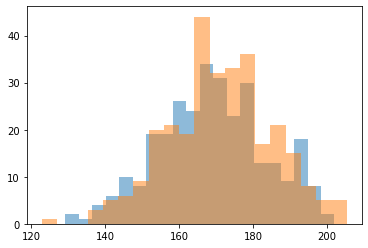

In [27]:
# визуализация различий
plt.hist(A, bins=20, alpha=0.5)
plt.hist(B, bins=20, alpha=0.5)
plt.show()